



# Is Hosting Olympics beneficial to the country?
----------------------------------------------------------------------------------------


### Case study is Brazil hosting Summer Olympics
### "Rio 2016"

In [203]:
import pandas as pd

### How the hosting of Rio 2016 affected the number of medals Brazil won.
* Calculate the number of total Medals Brazil won over years
* Calculate the number of Gold Medals Brail won over years
* Compare Medals count in the hosting year to the previous years 

In [204]:
# Load data about all the athletes/events through the history of Olympics games
path = "../Resources/athlete_events.csv"
all_olymp = pd.read_csv(path)

In [205]:
# Create Data Frame for Brazil team 
brazil_all = all_olymp.loc[(all_olymp["Team"]=="Brazil")|(all_olymp["Team"]=="Brazil-1")]
brazil_all

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
665,386,Alexandre Abeid,M,22.0,194.0,92.0,Brazil,BRA,1972 Summer,1972,Summer,Munich,Volleyball,Volleyball Men's Volleyball,NaN
666,386,Alexandre Abeid,M,26.0,194.0,92.0,Brazil,BRA,1976 Summer,1976,Summer,Montreal,Volleyball,Volleyball Men's Volleyball,NaN
668,388,Abel Carlos da Silva Braga,M,19.0,190.0,73.0,Brazil,BRA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN
781,451,Diana Monteiro Abla,F,21.0,175.0,75.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Water Polo,Water Polo Women's Water Polo,NaN
1005,565,Glauclio Serro Abreu,M,26.0,185.0,75.0,Brazil,BRA,2004 Summer,2004,Summer,Athina,Boxing,Boxing Men's Middleweight,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268652,134400,"Maria Jos ""Zz"" Bertolotti",F,26.0,190.0,NaN,Brazil,BRA,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Women's Basketball,NaN
269745,134976,Sieglinda Lenk Zigler,F,17.0,NaN,NaN,Brazil,BRA,1936 Summer,1936,Summer,Berlin,Swimming,Swimming Women's 100 metres Backstroke,NaN
269899,135037,Moacir Zimmermann,M,32.0,184.0,70.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 20 kilometres Walk,NaN
270478,135289,Zzimo Alves Calazans,M,20.0,NaN,NaN,Brazil,BRA,1952 Summer,1952,Summer,Helsinki,Football,Football Men's Football,NaN


#### Clean data
#### Drop rows with NaN values to calculate the number of medals Brazil won

In [206]:
bra_athlets_medal = brazil_all.dropna(inplace = False)
bra_athlets_medal

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1651,918,Ademir Roque Kaefer,M,24.0,179.0,74.0,Brazil,BRA,1984 Summer,1984,Summer,Los Angeles,Football,Football Men's Football,Silver
1652,918,Ademir Roque Kaefer,M,28.0,179.0,74.0,Brazil,BRA,1988 Summer,1988,Summer,Seoul,Football,Football Men's Football,Silver
1668,925,Adenzia Aparecida Ferreira da Silva,F,25.0,187.0,65.0,Brazil,BRA,2012 Summer,2012,Summer,London,Volleyball,Volleyball Women's Volleyball,Gold
1733,966,Daniel Adler,M,26.0,180.0,72.0,Brazil,BRA,1984 Summer,1984,Summer,Los Angeles,Sailing,Sailing Mixed Three Person Keelboat,Silver
1856,1020,Adriana Aparecida dos Santos,F,25.0,180.0,61.0,Brazil,BRA,1996 Summer,1996,Summer,Atlanta,Basketball,Basketball Women's Basketball,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267709,133931,Arthur Nabarrete Zanetti,M,26.0,156.0,61.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Rings,Silver
268211,134186,"Jos Elias ""Z Elias"" Moedim Jnior",M,19.0,178.0,75.0,Brazil,BRA,1996 Summer,1996,Summer,Atlanta,Football,Football Men's Football,Bronze
268218,134190,"Jos Marco ""Z Marco"" Nobrega Ferreira de Melo",M,29.0,190.0,86.0,Brazil-1,BRA,2000 Summer,2000,Summer,Sydney,Beach Volleyball,Beach Volleyball Men's Beach Volleyball,Silver
268219,134191,"Jos Marcelo ""Z Maria"" Ferreira",M,22.0,175.0,71.0,Brazil,BRA,1996 Summer,1996,Summer,Atlanta,Football,Football Men's Football,Bronze


#### Search for duplicates, include Athlet ID, Games, Event and Medal

In [198]:
medal_duplicates = bra_athlets_medal.loc[bra_athlets_medal.duplicated(subset = ["ID", "Games", "Medal", "Event"])]
medal_duplicates

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal


#### Create DataFrame with medals for Brazil
* Initially data set includes all medals for all athletes
* We need to exlude medals that athlets win in the same event
* E.g. for such events as "Football Men's Football" the whole team gets medal, but for Brazil it is only one medal

In [207]:
# Get Names of Group Events with duplicated medals

# Get years Brazil participated in Olympics
years = bra_athlets_medal["Year"].unique()

# Create List to store Names of Group Events
group_events = []

# Iterate bra_athlets_medal DataFrame by years
for year in years:
    
    df = bra_athlets_medal.loc[(bra_athlets_medal["Year"]==year)]
    
    # For each year find duplicates in Event, Medal columns, get Group Names from Event column
    values = df.loc[df.duplicated(subset = ["Event", "Medal"])]["Event"].unique()
    
    # Add found unique Group Names to group_events    
    for val in values:
        if val not in group_events:
            group_events.append(val)
            
group_events

["Football Men's Football",
 "Volleyball Men's Volleyball",
 'Sailing Mixed Three Person Keelboat',
 'Sailing Mixed Multihull',
 'Sailing Mixed Two Person Keelboat',
 "Beach Volleyball Men's Beach Volleyball",
 "Volleyball Women's Volleyball",
 "Beach Volleyball Women's Beach Volleyball",
 "Sailing Men's Two Person Keelboat",
 "Basketball Women's Basketball",
 "Athletics Men's 4 x 100 metres Relay",
 'Equestrianism Mixed Jumping, Team',
 "Swimming Men's 4 x 100 metres Freestyle Relay",
 "Football Women's Football",
 "Sailing Women's Two Person Dinghy",
 "Basketball Men's Basketball",
 "Sailing Women's Skiff",
 "Canoeing Men's Canadian Doubles, 1,000 metres",
 "Swimming Men's 4 x 200 metres Freestyle Relay",
 'Sailing Mixed Two Person Dinghy',
 'Sailing Mixed Two Person Heavyweight Dinghy']

In [208]:
# Store indices of found duplicated medals
indices = []

# Iterate over Data Frame to locate indices of the duplicated medals
# By duplicated here we mean medal for a group event like "Volleyball Men's Volleyball"

# For each year
for year in years:
   
    # Find duplicated medals for each event in group_events    
    for event in group_events:
        
        all_index = bra_athlets_medal.loc[
            (bra_athlets_medal["Year"]==year)&(bra_athlets_medal["Event"]==event)].index
        
        # If such medals are found store the indices of rows except the first one to keep the medal for Brazil        
        if len(all_index)>0:
            
            for i in range(1, len(all_index)):
                
                indices.append(all_index[i])

# Drop rows with duplicated medals                
brazil_medals = bra_athlets_medal.drop(indices, inplace=False)

# Save Brazil medals to .csv
brazil_medals.to_csv("Output/BRA_medals.csv")
brazil_medals

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1651,918,Ademir Roque Kaefer,M,24.0,179.0,74.0,Brazil,BRA,1984 Summer,1984,Summer,Los Angeles,Football,Football Men's Football,Silver
1652,918,Ademir Roque Kaefer,M,28.0,179.0,74.0,Brazil,BRA,1988 Summer,1988,Summer,Seoul,Football,Football Men's Football,Silver
1668,925,Adenzia Aparecida Ferreira da Silva,F,25.0,187.0,65.0,Brazil,BRA,2012 Summer,2012,Summer,London,Volleyball,Volleyball Women's Volleyball,Gold
1733,966,Daniel Adler,M,26.0,180.0,72.0,Brazil,BRA,1984 Summer,1984,Summer,Los Angeles,Sailing,Sailing Mixed Three Person Keelboat,Silver
1856,1020,Adriana Aparecida dos Santos,F,25.0,180.0,61.0,Brazil,BRA,1996 Summer,1996,Summer,Atlanta,Basketball,Basketball Women's Basketball,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221565,111358,Maicon de Andrade Siqueira,M,23.0,190.0,90.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Men's Heavyweight,Bronze
252454,126422,Douglas Eduardo Vieira,M,24.0,170.0,95.0,Brazil,BRA,1984 Summer,1984,Summer,Los Angeles,Judo,Judo Men's Half-Heavyweight,Silver
263339,131784,Felipe Almeida Wu,M,24.0,169.0,69.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Shooting,"Shooting Men's Air Pistol, 10 metres",Silver
267707,133931,Arthur Nabarrete Zanetti,M,22.0,156.0,61.0,Brazil,BRA,2012 Summer,2012,Summer,London,Gymnastics,Gymnastics Men's Rings,Gold


In [209]:
# Test DataFrame after drop
check = brazil_medals.loc[(brazil_medals["Year"]==2016)].sort_values(by='Event')
check

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
28565,14810,Thiago Braz da Silva,M,22.0,183.0,75.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's Pole Vault,Gold
4825,2758,Alison Conte Cerutti,M,30.0,203.0,106.0,Brazil-1,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Beach Volleyball,Beach Volleyball Men's Beach Volleyball,Gold
14312,7716,Brbara Seixas de Freitas,F,29.0,178.0,67.0,Brazil-1,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Beach Volleyball,Beach Volleyball Women's Beach Volleyball,Silver
43889,22623,Robson Donato Conceio,M,27.0,171.0,57.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Boxing,Boxing Men's Lightweight,Gold
194969,97845,Isaquias Queiroz dos Santos,M,22.0,175.0,85.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Canoeing,"Canoeing Men's Canadian Doubles, 1,000 metres",Silver
194968,97845,Isaquias Queiroz dos Santos,M,22.0,175.0,85.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Canoeing,"Canoeing Men's Canadian Singles, 1,000 metres",Silver
194967,97845,Isaquias Queiroz dos Santos,M,22.0,175.0,85.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Canoeing,"Canoeing Men's Canadian Singles, 200 metres",Bronze
58064,29713,Douglas dos Santos Justino de Melo,M,22.0,173.0,69.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Football,Football Men's Football,Gold
149540,75010,Arthur Nory Oyakawa Mariano,M,22.0,169.0,65.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Floor Exercise,Bronze
101753,51457,Diego Matias Hyplito,M,30.0,170.0,68.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Floor Exercise,Silver


### Bar Chart
#### Total Medals Brazil won in Olympics

<AxesSubplot:title={'center':'Total number of Medals Brazil won over years'}, xlabel='Y e a r s', ylabel='Number of Total Medals'>

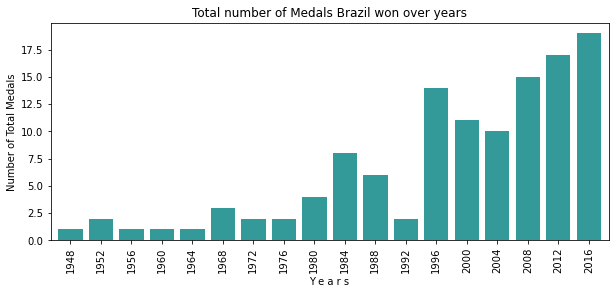

In [210]:
# Calculate the number of total Medals over years
total_medals = brazil_medals.groupby("Year")["Medal"].count()

medals_plot = total_medals.plot(kind = "bar", figsize=(10,4), width = 0.8, color="teal", alpha = 0.8,
                             title = "Total number of Medals Brazil won over years")
medals_plot.set_ylabel("Number of Total Medals")
medals_plot.set_xlabel("Y e a r s")
medals_plot

#### Gold Medals Brazil won in Olympics

<AxesSubplot:title={'center':'Total number of Gold Medals Brazil won over years'}, xlabel='Y e a r s', ylabel='Number of Gold Medals'>

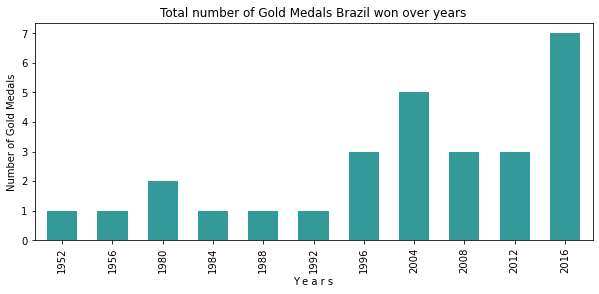

In [211]:
# Calculate the number of Gold Medals over years
gold_medals = brazil_medals.loc[brazil_medals["Medal"]=="Gold"].groupby("Year")["Medal"].count()

gold_plot = gold_medals.plot(kind = "bar", figsize=(10,4), width = 0.6, color="teal", alpha = 0.8,
                             title = "Total number of Gold Medals Brazil won over years")
gold_plot.set_ylabel("Number of Gold Medals")
gold_plot.set_xlabel("Y e a r s")
gold_plot

- The year Brazil was hosting the Olympics 2016
    * Total number of Medals Brazil were higher than in any other previous games: 19 medals total
    * Total number of Gold Medals Brazil were higher than in any other previous games: 7 gold medals